In [1]:
# Danesh Abdollahi _ 9723053 _ HW2 _ Question 2 _ Dr.Seyyedin _ Fall 2021

In [2]:
# Import Libraries
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.utils import shuffle
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
import pickle

In [4]:
# Import The Train Dataset
Dataset = pd.read_excel (r'traindataset_for_intro_to_ml.xlsx') 

0    88
1     8
Name: Outcome, dtype: int64




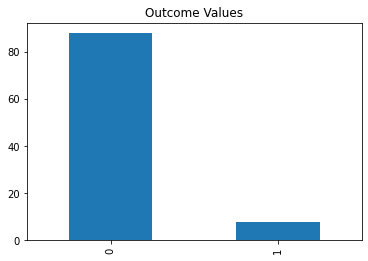

In [5]:
X = Dataset.iloc[:,1:7] # Inputs
Y = Dataset.iloc[:,7:]  # Outputs
# Evaluate The Balance Of 'Outcome'
print(Dataset.Outcome.value_counts())
print("\n")
Dataset.Outcome.value_counts().plot(kind='bar', title='Outcome Values') ;  
# As We See The Outcome Values are so imbalanced !!!

Data Number Of Split 1  = 0
Data Number Of Split 2  = 3
Data Number Of Split 3  = 21
Data Number Of Split 4  = 35
Data Number Of Split 5  = 29

After OverSampling
0    109
1     80
Name: Outcome, dtype: int64




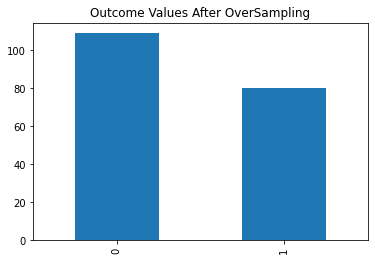

In [6]:
# Deviding The Outcome Classes ( 0 & 1 )
Class_0 = Dataset [Dataset['Outcome'] == 0]
Class_1 = Dataset [Dataset['Outcome'] == 1]
# Evaluate The Balance Of 'Twoyears.follow_up.Cobb'
Split1 = Dataset [ 0 <= Dataset['Twoyears.follow_up.Cobb']]
Split1 = Split1 [  Split1['Twoyears.follow_up.Cobb']< 10] # The Datas That Their 'Twoyears.follow_up.Cobb' Value is in peirod [0 ; 10)

Split2 = Dataset [ 10 <= Dataset['Twoyears.follow_up.Cobb']]
Split2 = Split2 [  Split2['Twoyears.follow_up.Cobb']< 20] # The Datas That Their 'Twoyears.follow_up.Cobb' Value is in peirod [10 ; 20)

Split3 = Dataset [ 20 <= Dataset['Twoyears.follow_up.Cobb']]
Split3 = Split3 [  Split3['Twoyears.follow_up.Cobb']< 30] # The Datas That Their 'Twoyears.follow_up.Cobb' Value is in peirod [20 ; 30)

Split4 = Dataset [ 30 <= Dataset['Twoyears.follow_up.Cobb']]
Split4 = Split4 [  Split4['Twoyears.follow_up.Cobb']< 40] # The Datas That Their 'Twoyears.follow_up.Cobb' Value is in peirod [30 ; 40)

Split5 = Dataset [ 40 <= Dataset['Twoyears.follow_up.Cobb']]
Split5 = Split5 [  Split5['Twoyears.follow_up.Cobb']<= 50] # The Datas That Their 'Twoyears.follow_up.Cobb' Value is in peirod [40 ; 50]

print(f'Data Number Of Split 1  = {len(Split1)}\nData Number Of Split 2  = {len(Split2)}\nData Number Of Split 3  = {len(Split3)}\nData Number Of Split 4  = {len(Split4)}\nData Number Of Split 5  = {len(Split5)}\n')

# Uniform OverSamplig : Adding More Examples From The Minority 'Outcome' Class ( 1 )
# And Adding More Examples From The Minority Split ( Split 2 )

Class_1_Over = Class_1 
for i in range (9):  # Repeating 'Outcome' Class ( 1 ) For 9 Times
  Class_1_Over = pd.concat([Class_1_Over, Class_1], axis=0)

New_Dataset = pd.concat([Class_0, Class_1_Over], axis=0)

for i in range(7):    # Repeating Split 2 For 7 Times
  New_Dataset = pd.concat([New_Dataset, Split2], axis=0)

for i in range(50):   # Shuffle The New_Dataset For 50 Times
  New_Dataset = shuffle(New_Dataset)

print('After OverSampling')
print(New_Dataset.Outcome.value_counts())
print("\n")
New_Dataset.Outcome.value_counts().plot(kind='bar', title='Outcome Values After OverSampling') ;
# Defining Inputs & Output From New_Dataset
X_New = New_Dataset.iloc[:,1:7] # New Inputs
Y_New = New_Dataset.iloc[:,7:]  # New Outputs


In [7]:
# Spliting The Whole Dataset Into Train and Valid Dataset
X_Train , X_Valid , Y_Train , Y_Valid = train_test_split( X_New , Y_New , test_size= 0.1 , shuffle=True )

In [8]:
# Transform The Inputs Of Train_Data To Center it By Removing The Mean Value Of Each Feature & Then Scale It By Dividing Features By Their Standard Deviation.
Scaler  = StandardScaler().fit(X_Train.values)
X_Train = Scaler.transform(X_Train.values)
X_Valid = Scaler.transform(X_Valid.values)

In [9]:
# Definign The Classifier & Regressor Model
Classifier = MLPClassifier( hidden_layer_sizes=(75) ,activation = 'logistic', solver = 'lbfgs' , learning_rate = 'adaptive' , max_iter = 10000 ,
                           early_stopping = True , validation_fraction = 0.2, shuffle=True , n_iter_no_change = 25 )
# The Classifier Model Will Be Used To Predict The "Outcome" Output
Regressor  = MLPRegressor ( hidden_layer_sizes=(75,25) , solver = 'adam' , learning_rate = 'adaptive' , max_iter = 10000 ,
                           early_stopping = True , validation_fraction = 0.2, shuffle=True , n_iter_no_change = 15 )
# The Regressor Model Will Be Used To Predict The "Twoyears.follow_up.Cobb" Output 

Classifier Score On Valid Dataset = 0.9473684210526315
Classifier F1 Score On Valid Dataset = 0.9473684210526316

Confusion Matrix Of Classifier Model On Valid Dataset:
 [[9 1]
 [0 9]]




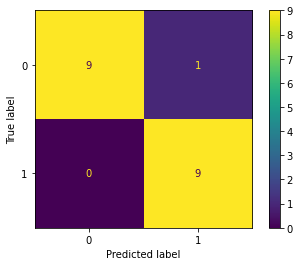



Confusion Matrix Of Classifier Model On Valid Dataset: (Shown In Percent)
 [[47.36842105  5.26315789]
 [ 0.         47.36842105]]




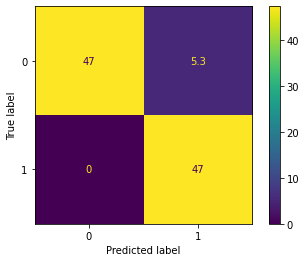



-----------------------------------------------------------------------------------------------------
Classifier Score On Train Dataset = 1.0
Classifier F1 Score On Train Dataset = 1.0

Confusion Matrix Of Classifier Model On Train Dataset:
 [[99  0]
 [ 0 71]]




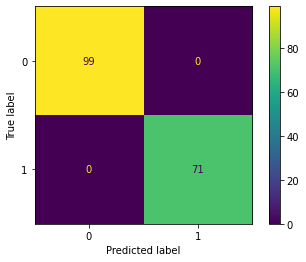



Confusion Matrix Of Classifier Model On Train Dataset: (Shown In Percent)
 [[58.23529412  0.        ]
 [ 0.         41.76470588]]




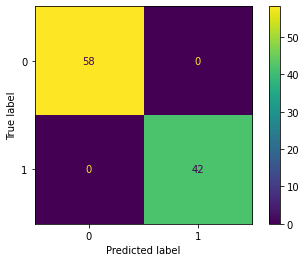

In [10]:
# Train The Classifier Model With Train Dataset
Classifier.fit( X_Train , Y_Train.iloc[:,1].values )
# Evaluate The Trained Classifier Model On Valid Dataset
Prediction = Classifier.predict(X_Valid) ;
print(f"Classifier Score On Valid Dataset = {Classifier.score(X_Valid , Y_Valid.iloc[:,1].values)}")
print(f"Classifier F1 Score On Valid Dataset = {sklearn.metrics.f1_score(Y_Valid.iloc[:,1].values , Prediction)}\n")

# Calculating And Plotting The Confusion Matrix Of Classifier Model On Valid Dataset
Conf_Matrix =  confusion_matrix (Y_Valid.iloc[:,1].values, Prediction) 
print(f"Confusion Matrix Of Classifier Model On Valid Dataset:\n {Conf_Matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()
print("\n")
print(f"Confusion Matrix Of Classifier Model On Valid Dataset: (Shown In Percent)\n {100*(Conf_Matrix/ len(Prediction))}")
disp = ConfusionMatrixDisplay(confusion_matrix=100*(Conf_Matrix /len(Prediction)) , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()
print("\n")
# Evaluate The Trained Classifier Model On Train Dataset
Prediction = Classifier.predict(X_Train) ;
print("-----------------------------------------------------------------------------------------------------")
print(f"Classifier Score On Train Dataset = {Classifier.score(X_Train , Y_Train.iloc[:,1].values)}")
print(f"Classifier F1 Score On Train Dataset = {sklearn.metrics.f1_score(Y_Train.iloc[:,1].values , Prediction)}\n")
# Calculating And Plotting The Confusion Matrix Of Classifier Model On Train Dataset
Conf_Matrix =  confusion_matrix (Y_Train.iloc[:,1].values, Prediction) 
print(f"Confusion Matrix Of Classifier Model On Train Dataset:\n {Conf_Matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()
print("\n")
print(f"Confusion Matrix Of Classifier Model On Train Dataset: (Shown In Percent)\n {100*(Conf_Matrix/ len(Prediction))}")
CM = ( confusion_matrix (Y_Train.iloc[:,1].values, Prediction) / len(Prediction) ) *100 
disp = ConfusionMatrixDisplay(confusion_matrix=100*(Conf_Matrix /len(Prediction)) , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()
print("\n")

Regressor R2_Score On Valid Dataset = 0.9479120125973131
Regressor RMSE On Valid Dataset = 3.6877024101274722

Regressor R2_Score On Train Dataset = 0.9355474672784252
Regressor RMSE On Train Dataset = 3.7239942622881075



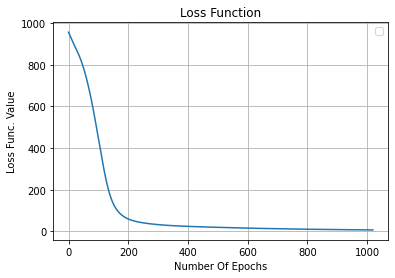

In [21]:
# Train The Regressor Model With Train Dataset
Regressor.fit(X_Train , Y_Train.iloc[:,0].values ) 
# Evaluate The Trained Regressor Model On Valid Dataset
Prediction = Regressor.predict( X_Valid )
print(f"Regressor R2_Score On Valid Dataset = {Regressor.score( X_Valid , Y_Valid.iloc[:,0].values )}")
print(f"Regressor RMSE On Valid Dataset = {sklearn.metrics.mean_squared_error( Y_Valid.iloc[:,0].values , Prediction , squared = False )}\n")
# Evaluate The Trained Regressor Model On Train Dataset
Prediction = Regressor.predict( X_Train )
print(f"Regressor R2_Score On Train Dataset = {Regressor.score( X_Train , Y_Train.iloc[:,0].values )}")
print(f"Regressor RMSE On Train Dataset = {sklearn.metrics.mean_squared_error( Y_Train.iloc[:,0].values , Prediction , squared = False )}\n")
# Plotting The Loss Function Value
pd.DataFrame(Regressor.loss_curve_).plot()
plt.title("Loss Function")
plt.xlabel("Number Of Epochs")
plt.ylabel("Loss Func. Value")
plt.legend("")
plt.grid("on") 

In [22]:
# Save The Trained Modeles
Classifier_filename = 'Trained_Classifier_Model'
pickle.dump(Classifier, open(Classifier_filename, 'wb'))

Regressor_filename = 'Trained_Regressor_Model'
pickle.dump(Regressor, open(Regressor_filename, 'wb'))

Classifier Score On Test Dataset = 0.9895833333333334
Classifier F1 Score On Test Dataset = 0.9411764705882353

Confusion Matrix Of Classifier Model On Test Dataset:
 [[87  1]
 [ 0  8]]




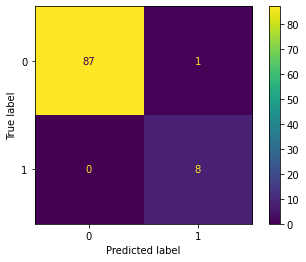



Confusion Matrix Of Classifier Model On Test Dataset: (Shown In Percent)
 [[90.625       1.04166667]
 [ 0.          8.33333333]]




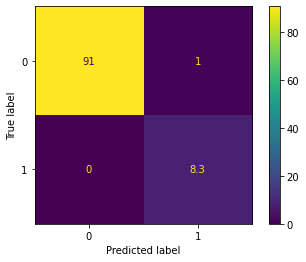


---------------------------------------------------------------------------------------------------
Regressor R2_Score On Test Dataset = 0.7699485363122898
Regressor RMSE On Test Dataset = 5.139948846472641



In [23]:
# You Can Loade The Saved Models & Evaluate The Models On Your Test Dataset
# Import Your Test Dataset : 
# Test = pd.read_excel (r'Your Test File') 
# X_Test = Test.iloc[:,1:7] 
# Y_Test = Test.iloc[:,7:] 
# X_Test = Scaler.transform(X_Test.values)

X_Test = Scaler.transform(X.values)
Y_Test = Y
# Load The Classifier_Model
Loaded_Classifier_Model = pickle.load(open(Classifier_filename, 'rb'))
# Evaluate The Classifier Model On Test Dataset
Prediction = Classifier.predict(X_Test) ;
print(f"Classifier Score On Test Dataset = {Classifier.score(X_Test , Y_Test.iloc[:,1].values)}")
print(f"Classifier F1 Score On Test Dataset = {sklearn.metrics.f1_score(Y_Test.iloc[:,1].values , Prediction)}\n")
# Calculating And Plotting The Confusion Matrix Of Classifier Model On Valid Dataset
Conf_Matrix =  confusion_matrix (Y_Test.iloc[:,1].values, Prediction) 
print(f"Confusion Matrix Of Classifier Model On Test Dataset:\n {Conf_Matrix}")
CM = confusion_matrix (Y_Test.iloc[:,1].values, Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()
print("\n")
print(f"Confusion Matrix Of Classifier Model On Test Dataset: (Shown In Percent)\n {100*(Conf_Matrix/ len(Prediction))}")
CM = ( confusion_matrix (Y_Test.iloc[:,1].values, Prediction) / len(Prediction) ) *100 
disp = ConfusionMatrixDisplay(confusion_matrix=CM , display_labels=[0 , 1])
disp.plot()
print("\n")
plt.show()

# Load The Regressor_Model
Loaded_Regressor_Model = pickle.load(open(Regressor_filename, 'rb'))
# Evaluate The Trained Regressor Model On Test Dataset
Prediction = Regressor.predict( X_Test )
print("\n---------------------------------------------------------------------------------------------------")
print(f"Regressor R2_Score On Test Dataset = {Regressor.score( X_Test , Y_Test.iloc[:,0].values )}")
print(f"Regressor RMSE On Test Dataset = {sklearn.metrics.mean_squared_error( Y_Test.iloc[:,0].values , Prediction , squared = False )}\n")
